In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [58]:
import tensorflow as tf
import os

In [59]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [60]:
#Avoid OOM erros by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)


In [61]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [62]:
data_dir = 'D:/AI-2/archive'

In [63]:
os.listdir(data_dir)

['no', 'yes']

In [64]:
image_exts = ['jpeg','jpg','bmp','png']

In [65]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [66]:
for image_class in os.listdir(data_dir):
    print(image_class)

no
yes


In [67]:
img = cv2.imread(os.path.join('D:/AI-2/archive','no','1 no.jpeg'))
img.shape

(630, 630, 3)

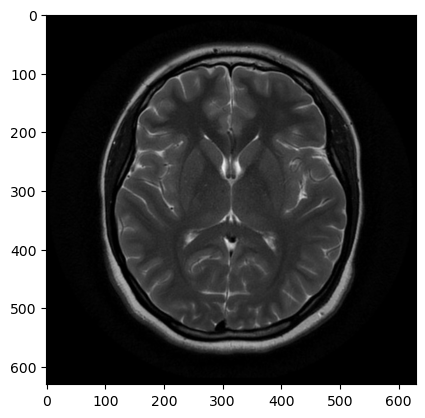

In [68]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [69]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in  image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path)) 

In [70]:
import numpy as np
from matplotlib import pyplot as plt

In [71]:
data = tf.keras.utils.image_dataset_from_directory('D:/AI-2/archive') #creating a pipeline

Found 250 files belonging to 2 classes.


In [72]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [73]:
data_iterator = data.as_numpy_iterator() #accessing the pipeline

In [74]:
data_iterator

In [75]:
#get another batch from the iterator
batch = data_iterator.next()

In [76]:
len(batch)


2

In [77]:
#class 1 = ppl with tumor
#class 0 = ppl without tumor
batch[1]

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1])

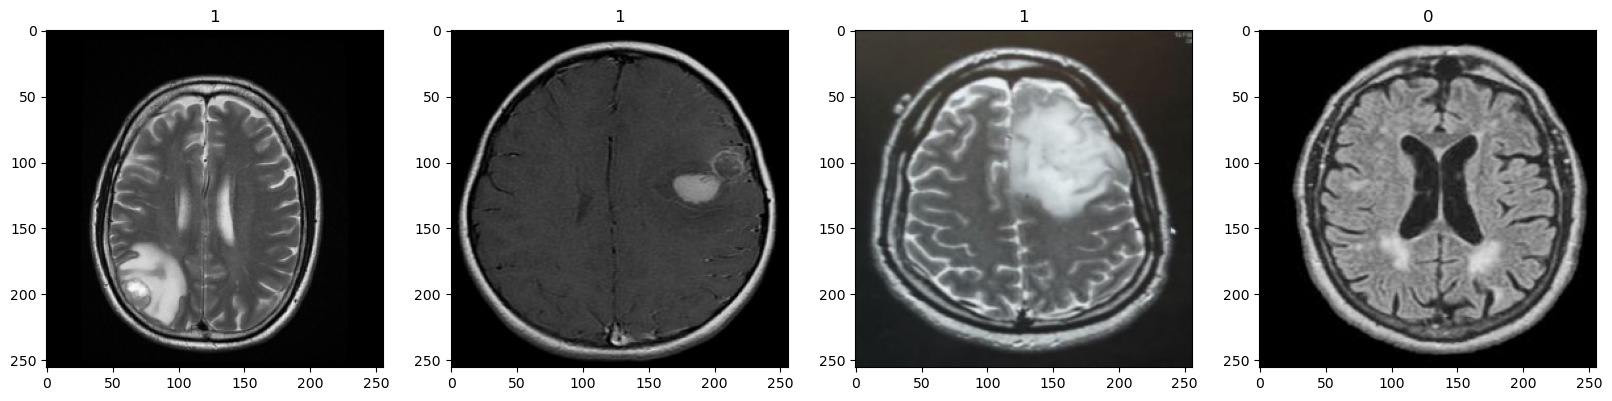

In [78]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [79]:
#preprocess data

In [80]:
scaled = batch[0] / 255

In [81]:
scaled.max()

1.0

In [82]:
data = data.map(lambda x, y: (x/255, y)) #scaling the batch value in the pipeline

In [83]:
scaled_iterator = data.as_numpy_iterator()

In [84]:
batch = scaled_iterator.next()

In [85]:
batch[0].max()

1.0

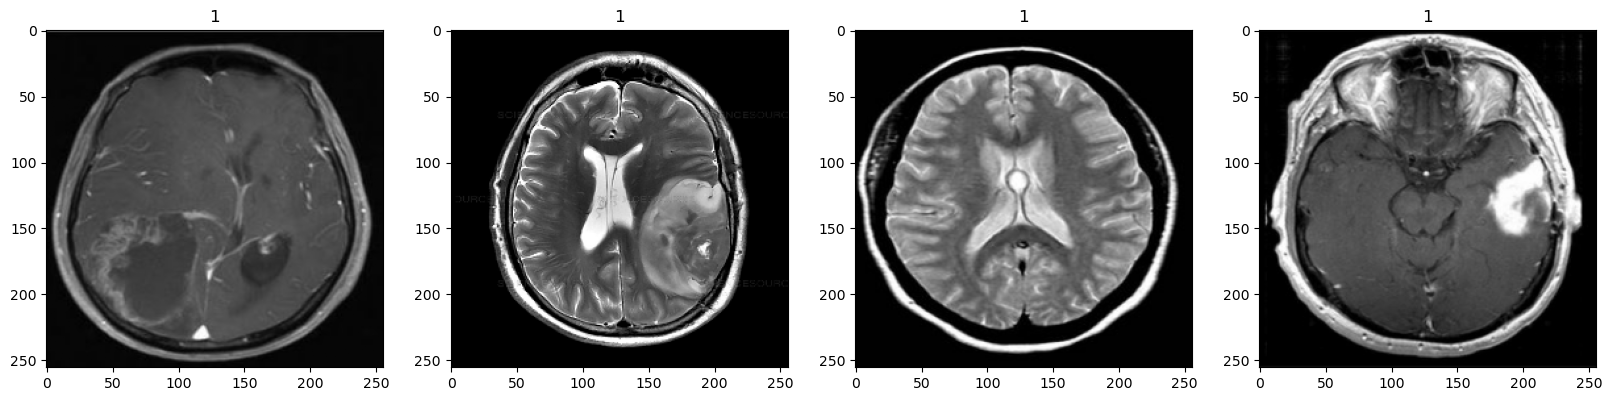

In [86]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [87]:
len(data)

8

In [88]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [89]:
train_size + val_size + test_size

7

In [90]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [91]:
len(test)

1

In [92]:
len(val)

1

In [93]:
len(train)

5

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [95]:
model = Sequential()

In [96]:
#this comvolution has 16filters, 3 pixel in size and a stride of 1 that is it moves 1 pixel each time
#relu means any positive value is converted to 0 and the remaining remains the same
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation ='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation ='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
#sigmoid activation outputs between 0 and 1
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [97]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [99]:
logdir='logs'

In [100]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [101]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
5/5 [==============================] - 7s 628ms/step - loss: 0.7430 - accuracy: 0.6750 - val_loss: 0.5399 - val_accuracy: 0.8125
Epoch 2/50
5/5 [==============================] - 3s 508ms/step - loss: 0.5120 - accuracy: 0.8125 - val_loss: 0.5492 - val_accuracy: 0.7188
Epoch 3/50
5/5 [==============================] - 3s 493ms/step - loss: 0.4898 - accuracy: 0.8188 - val_loss: 0.8071 - val_accuracy: 0.6250
Epoch 4/50
5/5 [==============================] - 3s 509ms/step - loss: 0.4309 - accuracy: 0.8438 - val_loss: 0.3999 - val_accuracy: 0.8750
Epoch 5/50
5/5 [==============================] - 3s 515ms/step - loss: 0.4265 - accuracy: 0.8000 - val_loss: 0.3152 - val_accuracy: 0.8438
Epoch 6/50
5/5 [==============================] - 3s 516ms/step - loss: 0.3111 - accuracy: 0.9000 - val_loss: 0.1793 - val_accuracy: 0.9062
Epoch 7/50
5/5 [==============================] - 3s 540ms/step - loss: 0.2640 - accuracy: 0.9062 - val_loss: 0.2533 - val_accuracy: 0.8750
Epoch 8/50
5/5 [====

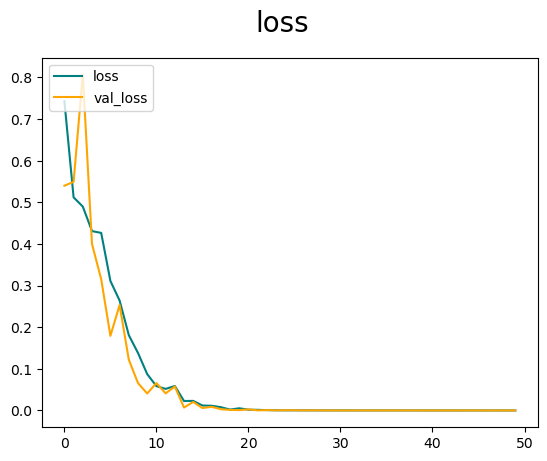

In [102]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

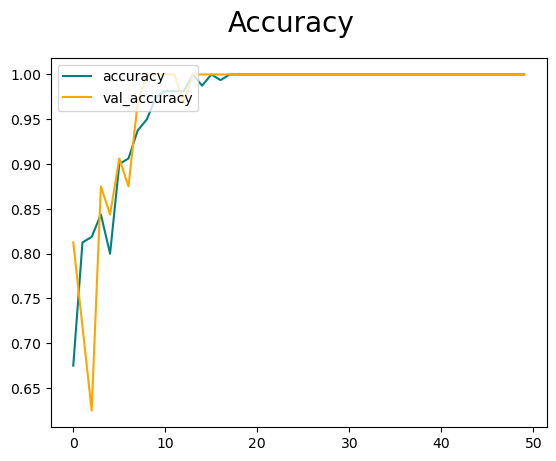

In [103]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [104]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [105]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [106]:
len(test)

1

In [107]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 384ms/step


In [108]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


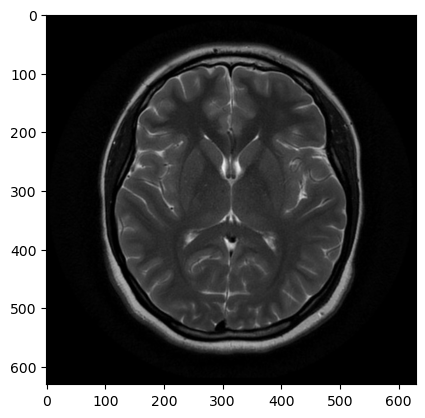

In [133]:
img = cv2.imread('D:/AI-2/archive/no/1 no.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

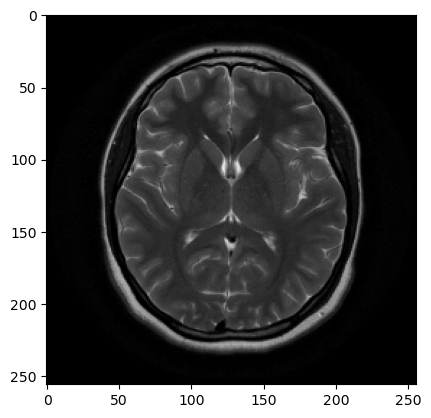

In [134]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [135]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [136]:
yhat

array([[4.9472617e-09]], dtype=float32)

In [137]:
if yhat < 0.5:
    print(f'Predicted class is healthy')
else:
    print(f'Predicted class is tumor')

Predicted class is healthy


In [121]:
from tensorflow.keras.models import load_model


In [122]:
model.save(os.path.join('models','tumor-healthy.h5'))

C:\Users\ghosh\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [155]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

# Load the mode
model = tf.keras.models.load_model(os.path.join('models', 'tumor-healthy.h5'))

# Path to the folder containing test images
test_folder_path = 'D:/test'

# Load test images
test_images = load_images_from_folder(test_folder_path)

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over test images
for img in test_images:
    # Resize image
    resize = cv2.resize(img, (256, 256))
    # Preprocess image
    processed_img = resize / 255.0
    processed_img = np.expand_dims(processed_img, axis=0)
    # Predict class probabilities
    yhatnew = new_model.predict(np.expand_dims(resize/255, 0))
    yhat = model.predict(processed_img)
    if yhatnew < 0.5:
        print(f'Predicted class is healthy')
    else:
        print(f'Predicted class is tumor')
    # Determine predicted label
    predicted_label = 0 if yhat == 0.1 else 1
    print(predicted_label)
    # Append true and predicted labels
    true_labels.append(0) if 'healthy' in test_folder_path else true_labels.append(1)
    predicted_labels.append(predicted_label)

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(pre)
print(re)
print(acc)
# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


1/1 [==============================] - 0s 72ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 22ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 21ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 28ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 29ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 32ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 26ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 25ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 23ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 26ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 24ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 23ms/step
Predicted class is healthy
1
1/1 [=======================

1/1 [==============================] - 0s 28ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 29ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 24ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 29ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 26ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 31ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 29ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 28ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 30ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 31ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 26ms/step
Predicted class is healthy
1
1/1 [==============================] - 0s 31ms/step
Predicted class is healthy
1
1/1 [=======================

1/1 [==============================] - 0s 27ms/step
Predicted class is tumor
1
1/1 [==============================] - 0s 24ms/step
Predicted class is tumor
1
1/1 [==============================] - 0s 26ms/step
Predicted class is tumor
1
1/1 [==============================] - 0s 28ms/step
Predicted class is tumor
1
1/1 [==============================] - 0s 25ms/step
Predicted class is tumor
1
1/1 [==============================] - 0s 26ms/step
Predicted class is tumor
1
1/1 [==============================] - 0s 25ms/step
Predicted class is tumor
1
1/1 [==============================] - 0s 26ms/step
Predicted class is tumor
1
1/1 [==============================] - 0s 28ms/step
Predicted class is tumor
1
1/1 [==============================] - 0s 27ms/step
Predicted class is tumor
1
1/1 [==============================] - 0s 23ms/step
Predicted class is tumor
1
1/1 [==============================] - 0s 26ms/step
Predicted class is tumor
1
1/1 [==============================] - 0s 26ms/step


In [129]:
new_model = load_model(os.path.join('models', 'tumor-healthy.h5'))

In [124]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 91ms/step


In [126]:
if yhatnew < 0.5:
    print(f'Predicted class is healthy')
else:
    print(f'Predicted class is tumor')

Predicted class is tumor
